In [422]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [423]:
df = pd.read_csv("IMDb Movies India.csv", encoding = "ISO-8859-1")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [426]:
df.describe

<bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Vot

In [427]:
df.shape

(15509, 10)

In [428]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [429]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [430]:
df.dropna(axis=1)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [431]:
df.duplicated().sum()

6

In [432]:
df.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
df["Genre"].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [434]:
df["Director"].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [435]:
df["Actor 1"].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [436]:
df["Actor 2"].value_counts()

Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: Actor 2, Length: 4891, dtype: int64

In [437]:
df["Actor 3"].value_counts()

Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: Actor 3, Length: 4820, dtype: int64

In [438]:
# Define a custom function to concatenate actor names
def combine_actors(row):
    # Create a list of non-null actor names
    actors = [row['Actor 1'], row['Actor 2'], row['Actor 3']]
    actors = [actor for actor in actors if pd.notna(actor)]
    
    # Join the actor names into a single string
    return ', '.join(actors)

# Apply the custom function to create the "Actors" column
df['Actors'] = df.apply(combine_actors, axis=1)

# Drop the original "Actor 1," "Actor 2," and "Actor 3" columns
df.drop(columns=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)


In [439]:
df = df.drop(["Name", "Votes"], axis=1)
df

,Year,Duration,Genre,Rating,Director,Actors
0,NaN,NaN,Drama,NaN,J.S. Randhawa,"Manmauji, Birbal, Rajendra Bhatia"
1,(2019),109 min,Drama,7.0,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
2,(2021),90 min,"Drama, Musical",NaN,Soumyajit Majumdar,"Sayani Gupta, Plabita Borthakur, Roy Angana"
3,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
4,(2010),105 min,Drama,NaN,Amol Palekar,"Rajat Kapoor, Rituparna Sengupta, Antara Mali"
...,...,...,...,...,...,...
15504,(1988),NaN,Action,4.6,Mahendra Shah,"Naseeruddin Shah, Sumeet Saigal, Suparna Anand"
15505,(1999),129 min,"Action, Drama",4.5,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"
15506,(2005),NaN,Action,NaN,Kiran Thej,Sangeeta Tiwari
15507,(1988),NaN,Action,NaN,NaN,


In [440]:
df['Year'].fillna(0, inplace=True)

df['Year'] = df['Year'].str.extract('(\d+)').fillna(0).astype(int)


In [441]:
df.dropna(subset=['Duration'], inplace=True)

df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float).astype(int)


In [442]:
df['Rating'].fillna(0, inplace=True)

In [443]:
df.fillna(0, inplace=True)

In [444]:
df.dropna(subset=["Year", "Duration", "Genre", "Director", "Actors"], inplace=True)

In [445]:
df.shape

(7240, 6)

In [446]:
df

,Year,Duration,Genre,Rating,Director,Actors
1,2019,109,Drama,7.0,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
2,2021,90,"Drama, Musical",0.0,Soumyajit Majumdar,"Sayani Gupta, Plabita Borthakur, Roy Angana"
3,2019,110,"Comedy, Romance",4.4,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
4,2010,105,Drama,0.0,Amol Palekar,"Rajat Kapoor, Rituparna Sengupta, Antara Mali"
5,1997,147,"Comedy, Drama, Musical",4.7,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,2001,153,"Biography, Drama, History",6.2,Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15503,1989,125,"Action, Crime, Drama",5.8,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15505,1999,129,"Action, Drama",4.5,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [447]:
features = ["Year", "Duration", "Genre", "Director", "Actors"]
X = pd.get_dummies(df[features])

y = df["Rating"]


In [448]:
y

1        7.0
2        0.0
3        4.4
4        0.0
5        4.7
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 7240, dtype: float64

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [450]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [451]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [452]:
y_pred = model.predict(X_test_scaled)

In [453]:
y_pred

array([-2.88696875e-01,  2.08969580e+13, -1.05360976e+12, ...,
        4.19461309e+13, -9.94075456e+11,  2.60800011e+13])

In [454]:
dfs = {'Prediction ': y_pred, 'Truth values ': y_test}
result = pd.DataFrame(dfs)

result

,Prediction,Truth values
1985,-2.886969e-01,0.0
5627,2.089696e+13,5.1
8825,-1.053610e+12,6.5
5836,-7.844199e+12,7.5
13355,-8.609490e+12,4.0
...,...,...
5343,-1.411242e+12,6.6
4687,-7.402585e+12,4.7
4691,4.194613e+13,3.3
9774,-9.940755e+11,6.5


In [455]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 21868610744191.414
Mean Squared Error (MSE): 5.711643890484961e+27
Root Mean Squared Error (RMSE): 75575418559773.53
R-squared (R2): -7.886264986030418e+26


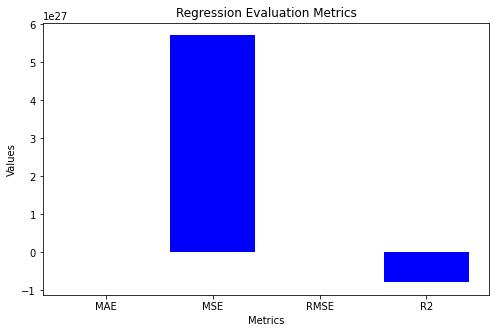

In [460]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='blue')
plt.title('Regression Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()


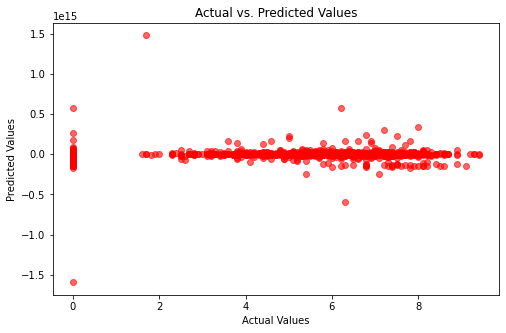

In [466]:
# Scatter Plot (Actual vs. Predicted)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='red', alpha=0.6)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
